# Exercises for Computational Tools for Data Science (02807) Week 7: Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn
from pathlib import Path

%load_ext watermark
%watermark --iversions

pandas    : 1.4.3
numpy     : 1.21.5
matplotlib: 3.5.2
sklearn   : 1.0.2



### Exercise 1: Visualise the data
Use _matplotlib_ to implement a viewer for two-dimensional data which reads a .dat-file and
displays it graphically (use the data files from the course page). Make sure you can specify a color for each point (for later use).

In [2]:
#assumes your notebook and Data folder are in the same directory

file = "cluster_Ring_1000_3.dat"
filepath = Path.cwd() / 'Data' / file

# NOTE: np.loadtxt() eventually fails when theres empty lines in some of the files
dat = np.genfromtxt(filepath, delimiter=';', usecols=(0,1))
n = dat[0][0].astype(int)
d = dat[0][1].astype(int)
points = dat[1:]

#sanity check
print(f'{n=}, {d=}\n{points.shape}')

n=1000, d=2
(1000, 2)


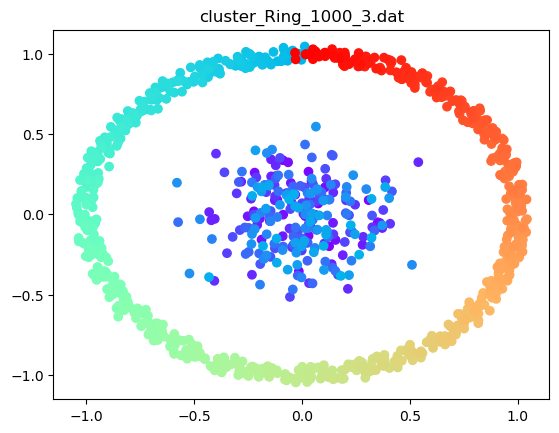

In [3]:
# create n different colors
colors = plt.cm.rainbow(np.linspace(0, 1, n))

plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.title(f"{file}")
plt.show()

In [4]:
# lets convert the code for data loading into a function

def load_dat(filepath, dim=2):
    """Loads in n-dimensional point files.
    
    Assumes the files contain n many d-dimensional points. The first line con-
    sists of “n;d;”. The following lines contain the coordinates of one point each, se-
    parated by semicolon.
    
    :param filepath: PurePath, Path object consisting of full filepath to the .dat file
    :param dim: int, dimension of the points
      default: 2, assumes 2 dimensions
      
    :return: int, int, nd-array, number of points, dimension, numpy array of points
    """
    
    # special case where the first line does not have “n;d;”
    if filepath.name.split("/")[-1] == "cluster_100_2_2.dat":
        points = np.genfromtxt(filepath, delimiter=';', usecols=(0,1))
        n, d = points.shape
    else:
        dat = np.genfromtxt(filepath, delimiter=';', usecols=range(dim))
        n = dat[0][0].astype(int)
        d = dat[0][1].astype(int)
        points = dat[1:]

    assert (n, d) == points.shape, f"Shape missmatch in {filepath.name}: \
                                    {n=}, {d=}, {points.shape=}"
    
    return n, d, points

In [5]:
#grab all the two and three dimension filepaths
two_dim = []
three_dim = []

datadir = Path.cwd() / 'Data'

for filepath in datadir.glob('*.dat'):
    if filepath.name.split('_')[-2] == '3':
        three_dim.append(filepath)
    else:
        two_dim.append(filepath)
        
len(two_dim), len(three_dim)

(18, 4)

#### Scatter plots of the 2d points

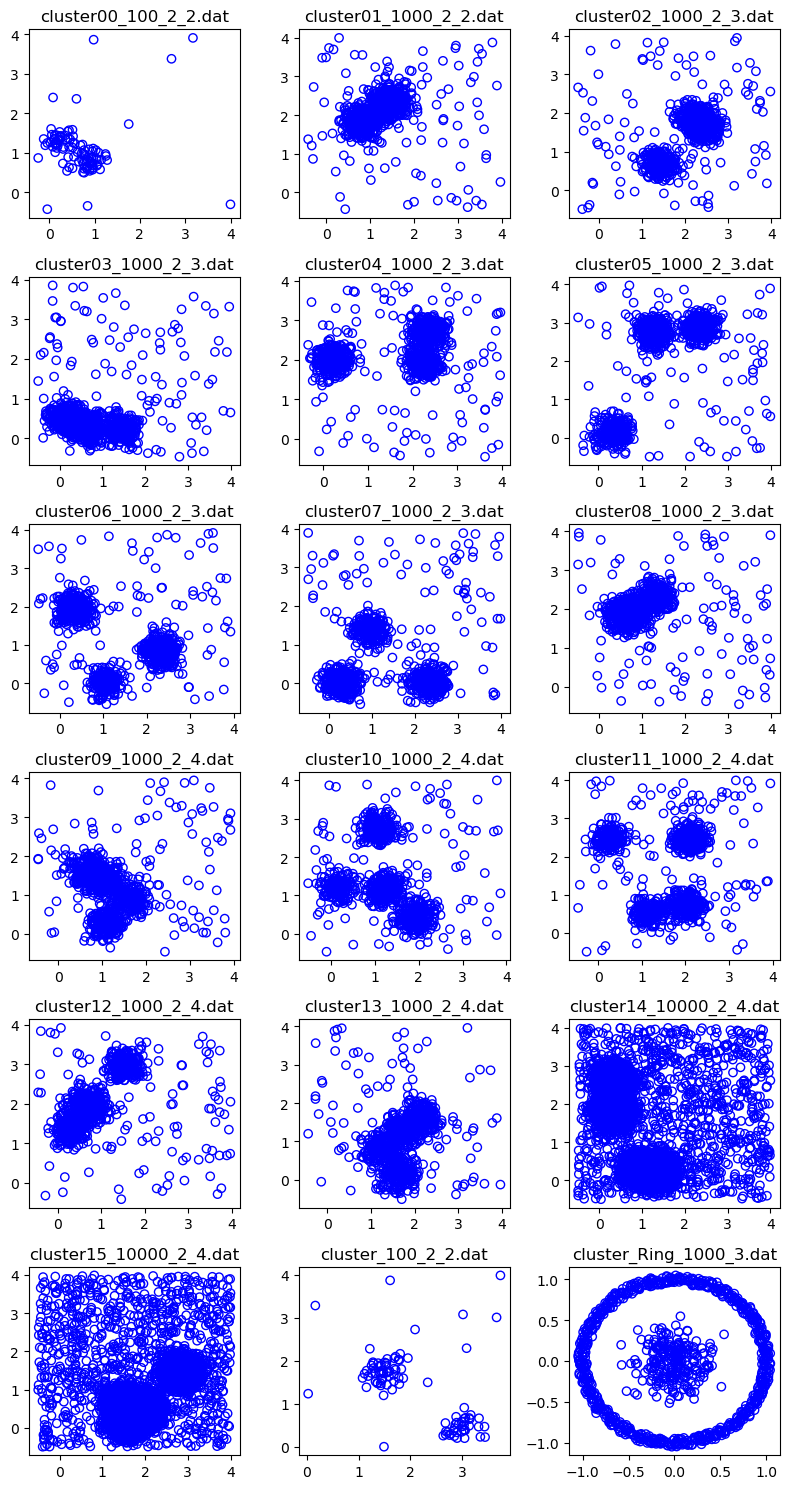

In [6]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,15))

for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)

    ax.scatter(points[:, 0], points[:, 1], facecolors ='none', edgecolors='b')
    ax.set_title(f"{filepath.name}")
plt.tight_layout()

#### Scatter plots of the 3d points

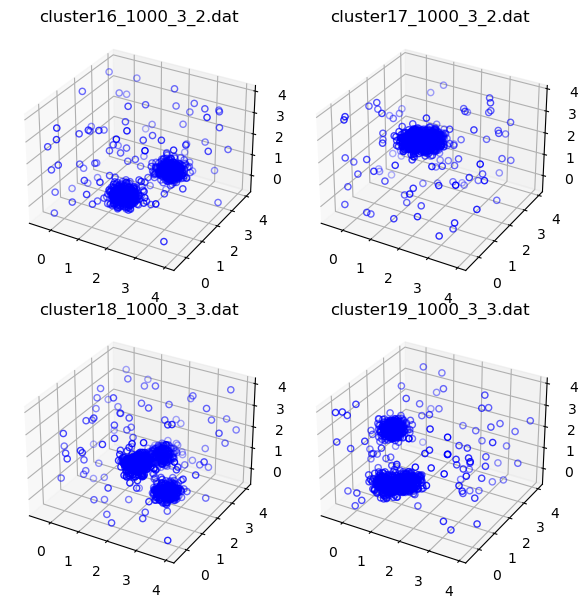

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6,6), subplot_kw={'projection':'3d'})

for filepath, ax in zip(sorted(three_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=3)

    ax.scatter(points[:, 0], points[:, 1], points[:, 2], facecolors ='none', edgecolors='b')
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

### Exercise 2: Run clustering algorithms from scikit-learn

Use _scikit-learn_ and run the (implemented versions of the) following algorithms on the test
data:

- [Hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)
- [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

#### Single dataset example

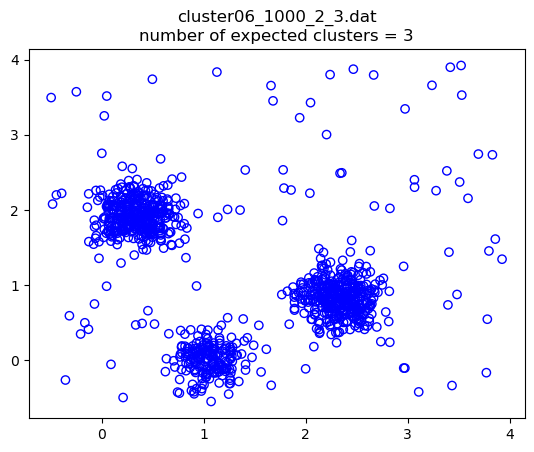

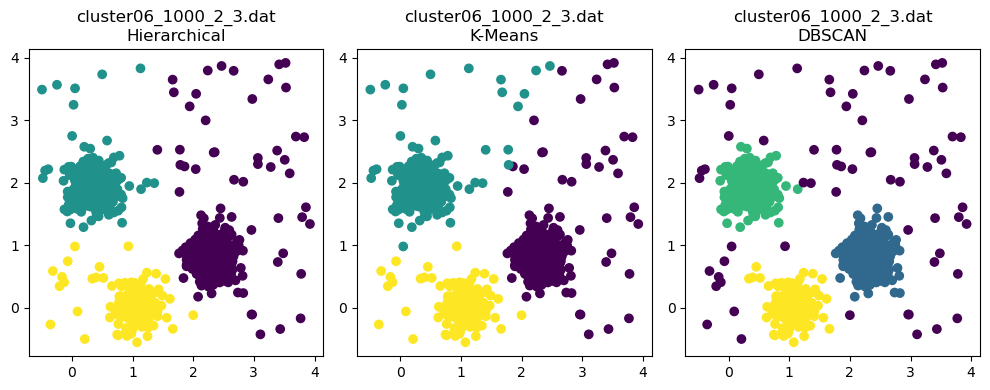

In [9]:
file = "cluster06_1000_2_3.dat"
filepath = Path.cwd() / 'Data' / file

n, d, points = load_dat(filepath)

n_clusters = int(filepath.name.split("_")[-1][0])

plt.scatter(points[:,0], points[:,1], facecolors ='none', edgecolors='b')
plt.title(f"{filepath.name}\nnumber of expected clusters = {n_clusters}")
plt.show()

########################

hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical.fit(points)

kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
kmeans.fit(points)

dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
dbscan.fit(points)


fig, axs = plt.subplots(ncols=3, figsize=(10,4))

axs[0].scatter(points[:,0], points[:,1], c=hierarchical.labels_)
axs[0].set_title(f"{filepath.name}\nHierarchical")

axs[1].scatter(points[:,0], points[:,1], c=kmeans.labels_)
axs[1].set_title(f"{filepath.name}\nK-Means")

axs[2].scatter(points[:,0], points[:,1], c=dbscan.labels_)
axs[2].set_title(f"{filepath.name}\nDBSCAN")

plt.tight_layout()

#### Multiple datasets

You should try out all the test files, to see how well the different algorithms work on different
kinds of data. Furthermore:
    
- Visualise the results for the 2-dimensional data.
- Experiment with the parameter settings, and explain the results.

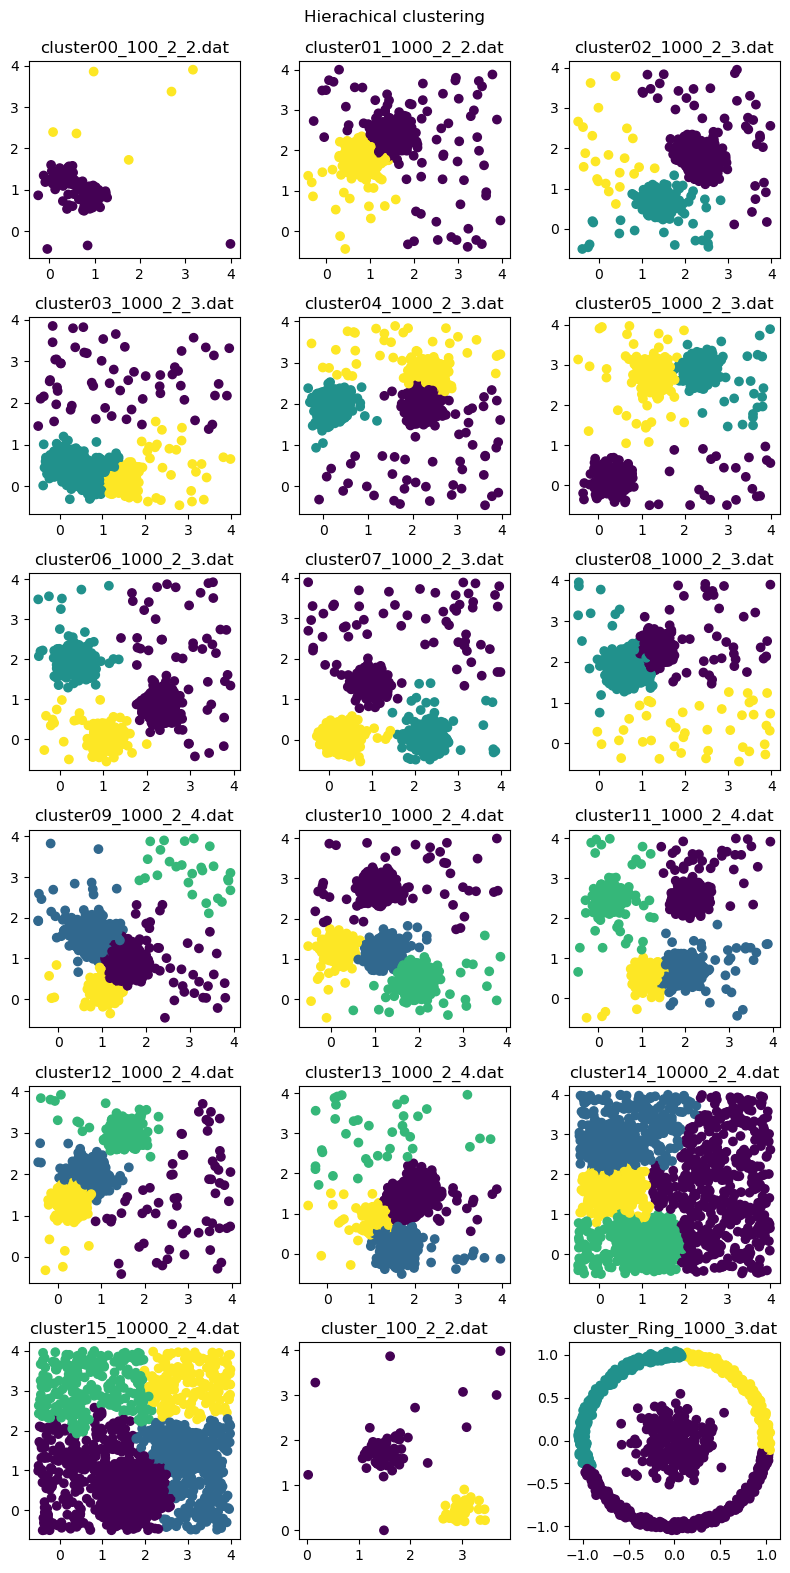

In [10]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))

plt.suptitle("Hierachical clustering\n")

for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    
    n_clusters = int(filepath.name.split("_")[-1][0])
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)

    ax.scatter(points[:, 0], points[:, 1], c=hierarchical.labels_)
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

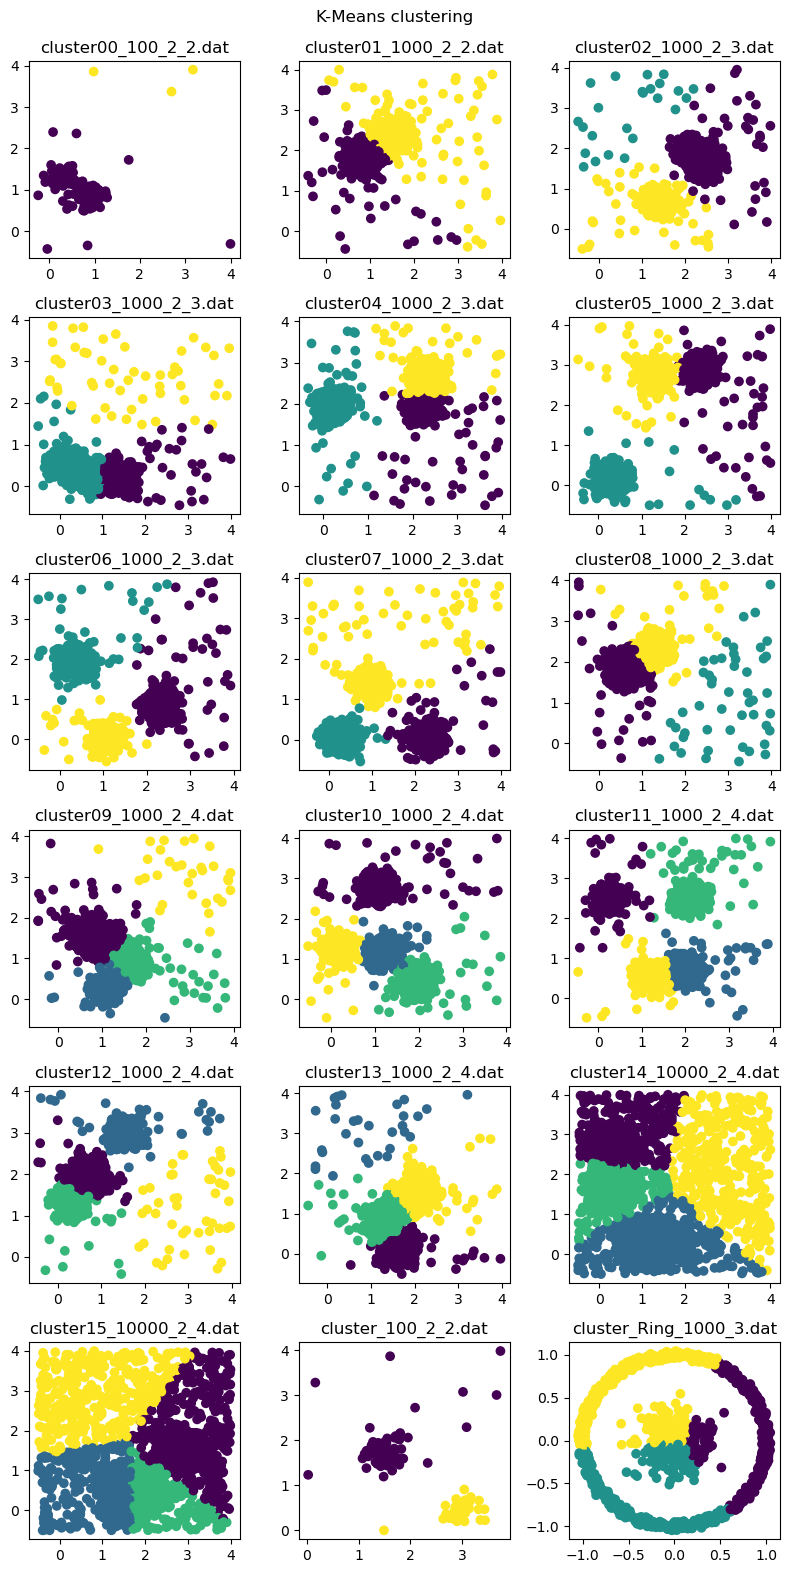

In [11]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))

plt.suptitle("K-Means clustering\n")

for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    
    n_clusters = int(filepath.name.split("_")[-1][0])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)

    ax.scatter(points[:, 0], points[:, 1], c=kmeans.labels_)
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()


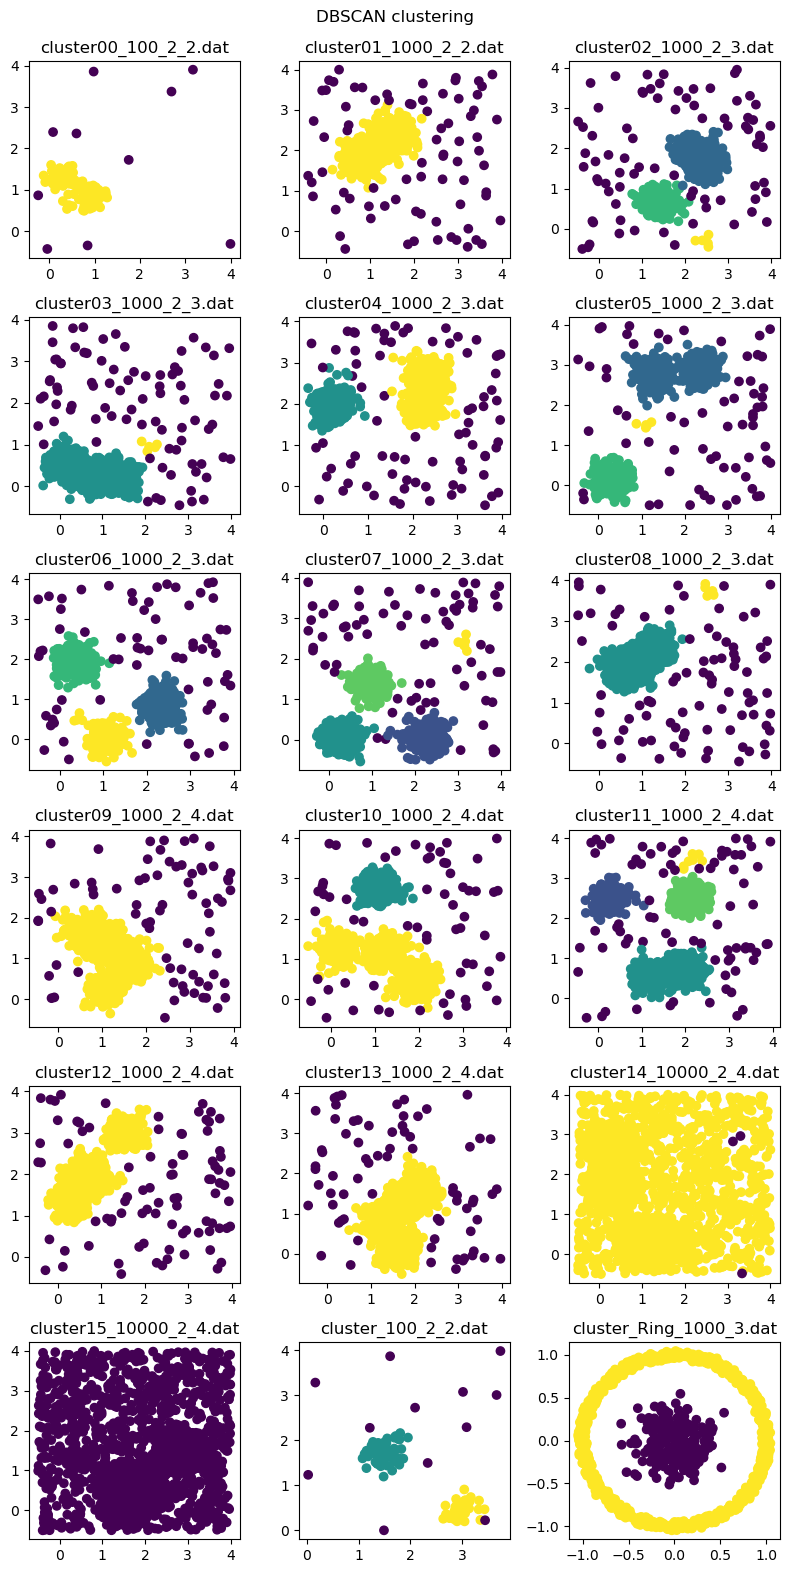

In [12]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(8,16))

plt.suptitle("DBSCAN clustering\n")

for filepath, ax in zip(sorted(two_dim), axs.flatten()):
    n, p, points = load_dat(filepath, dim=2)
    
    n_clusters = int(filepath.name.split("_")[-1][0])
    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)

    ax.scatter(points[:, 0], points[:, 1], c=dbscan.labels_)
    ax.set_title(f"{filepath.name}")
    
plt.tight_layout()

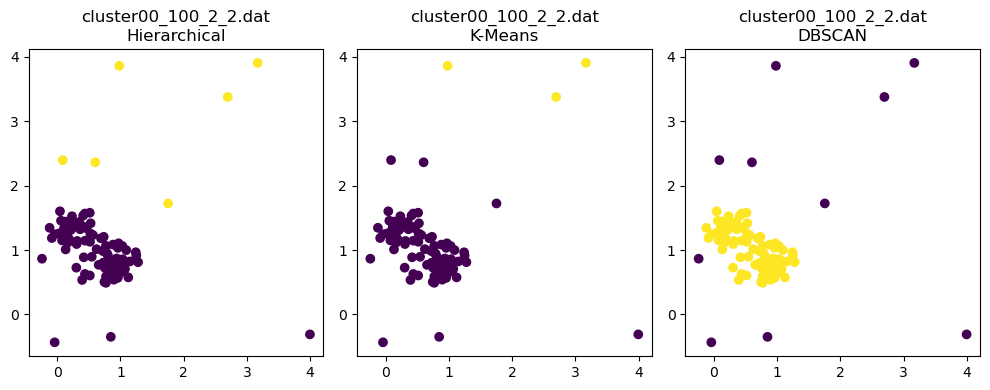

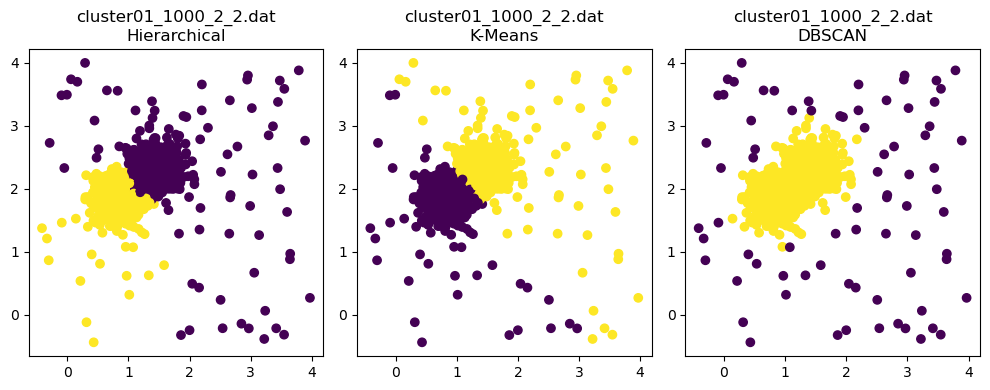

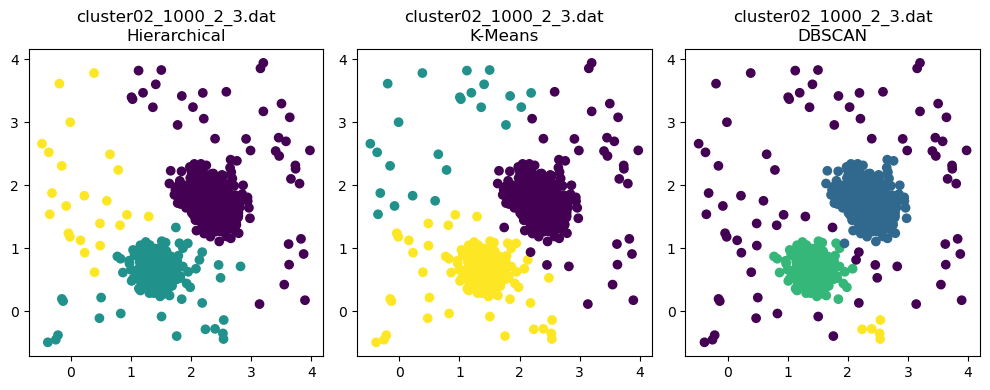

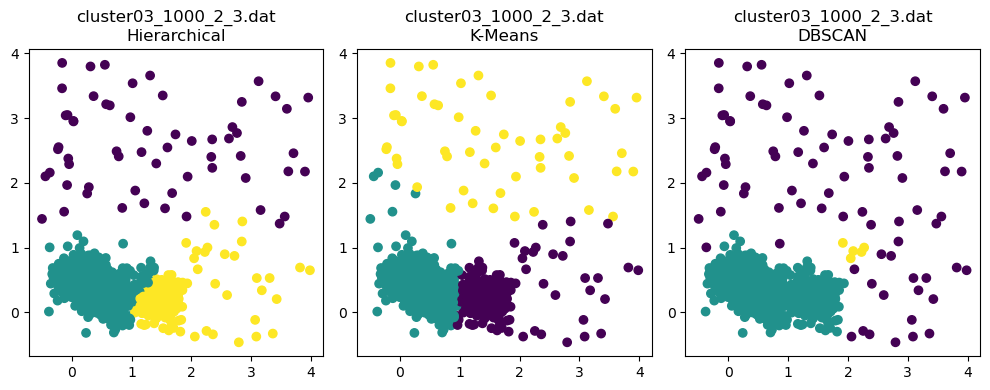

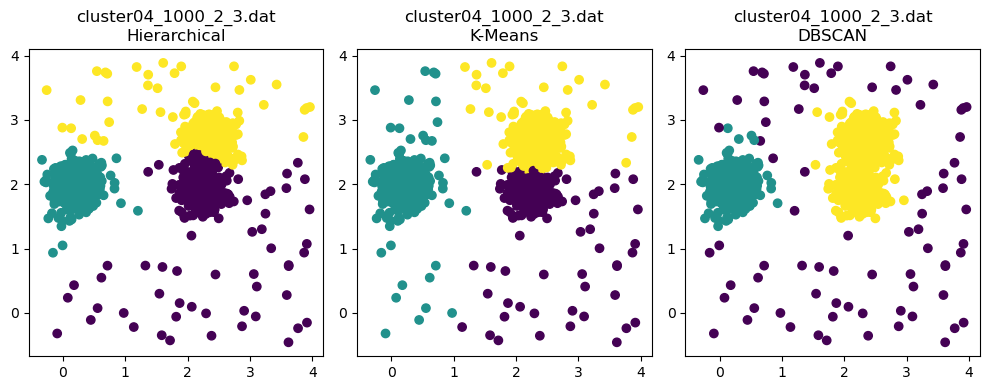

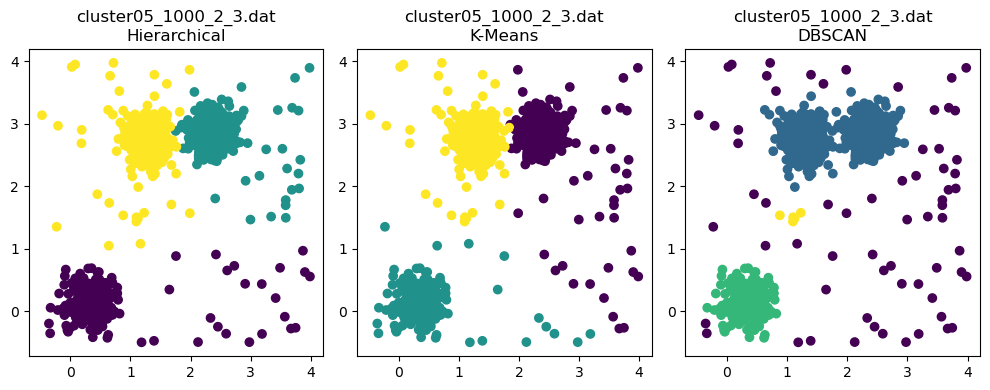

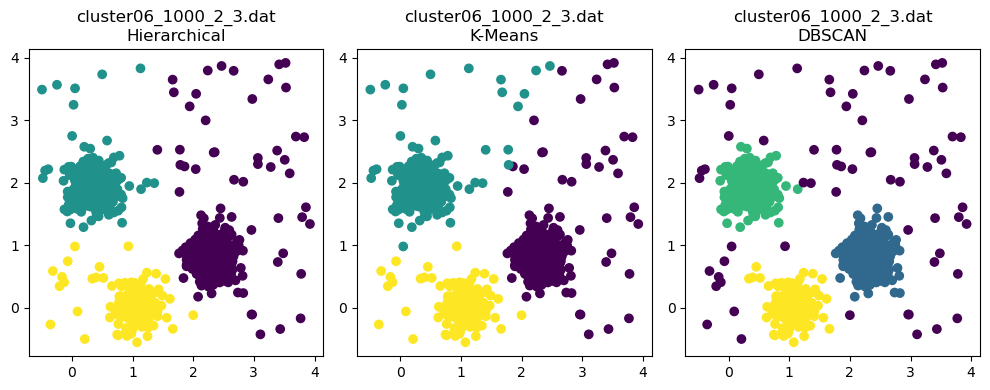

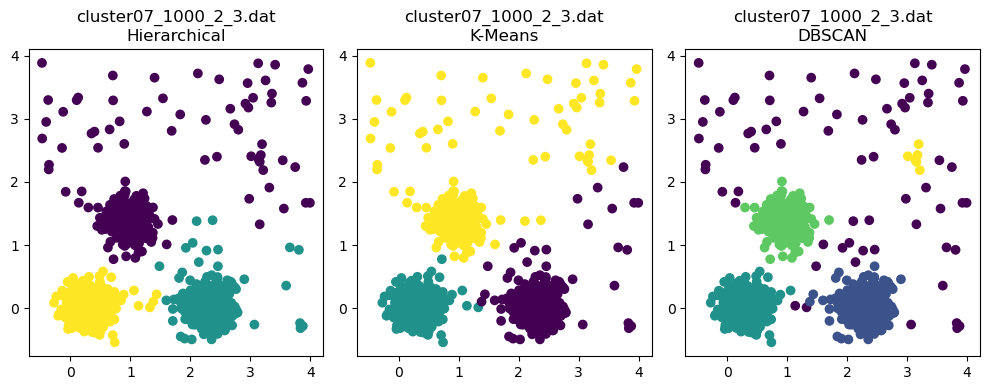

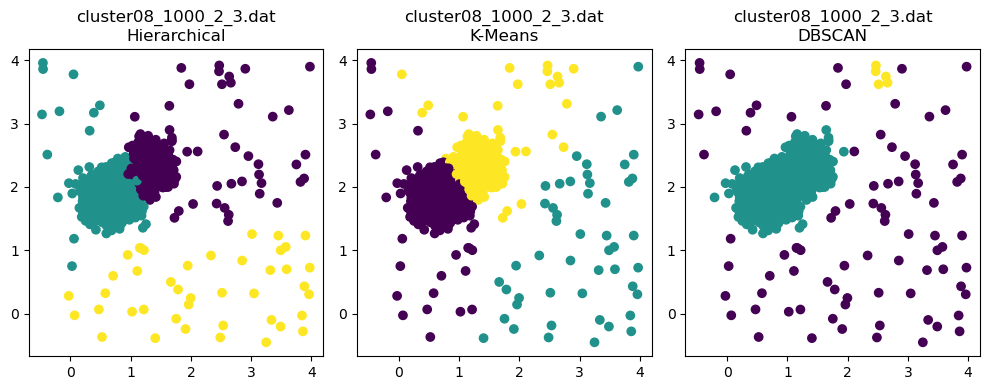

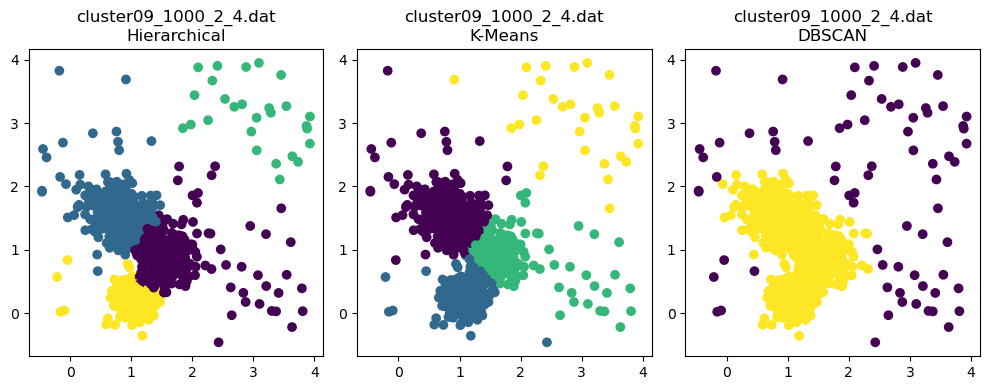

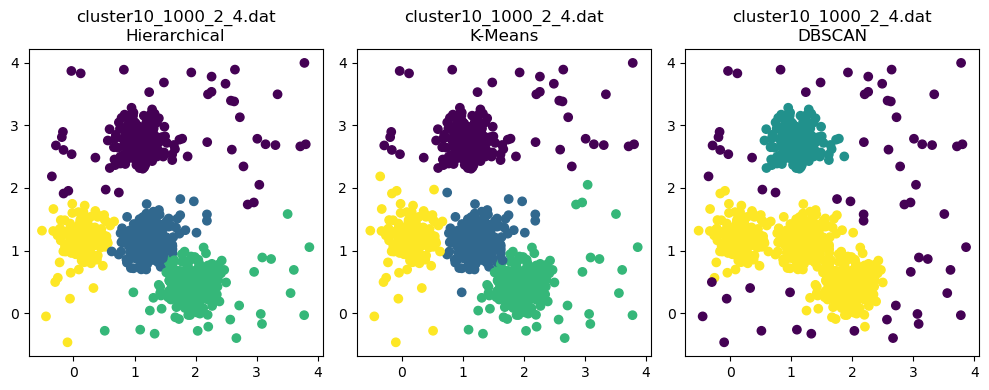

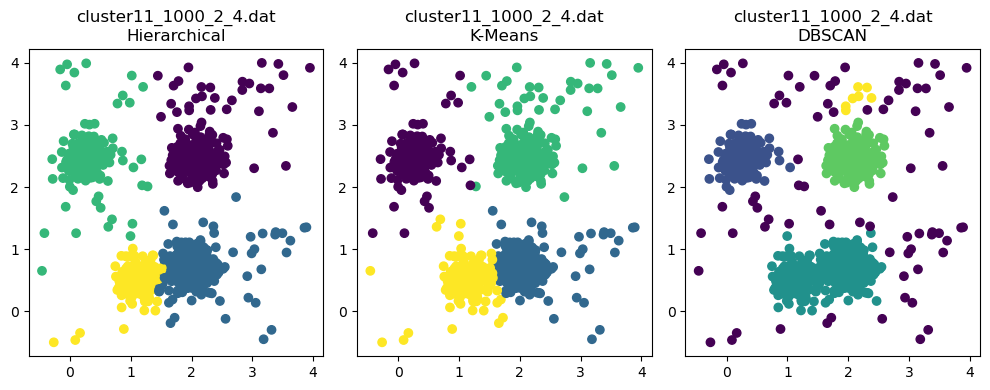

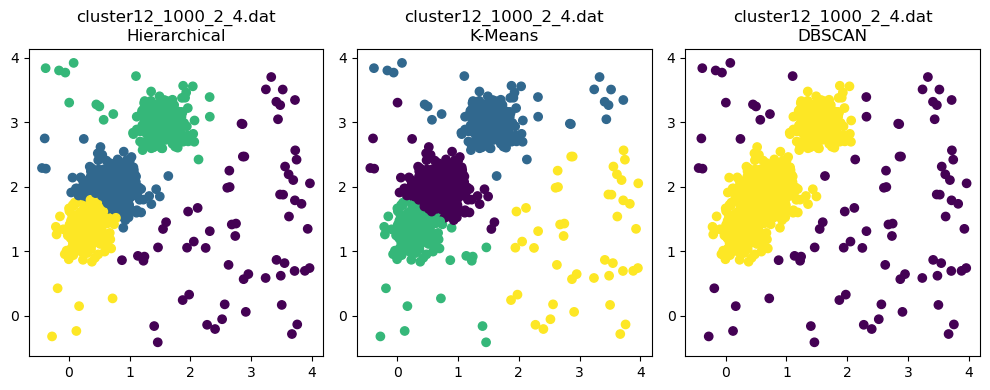

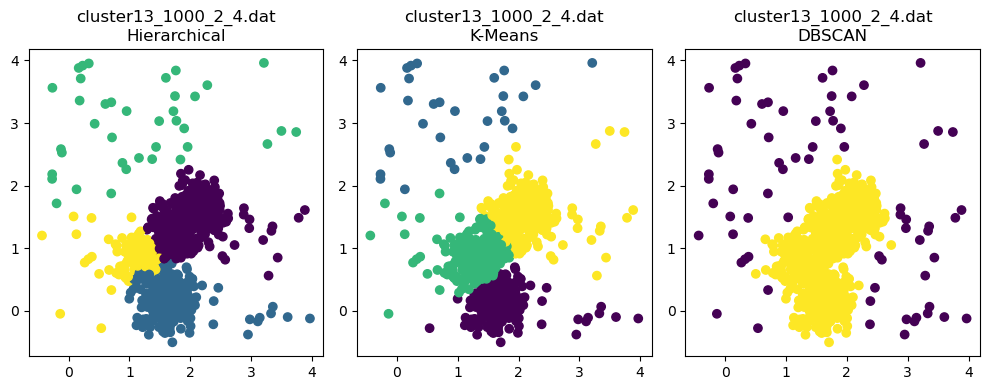

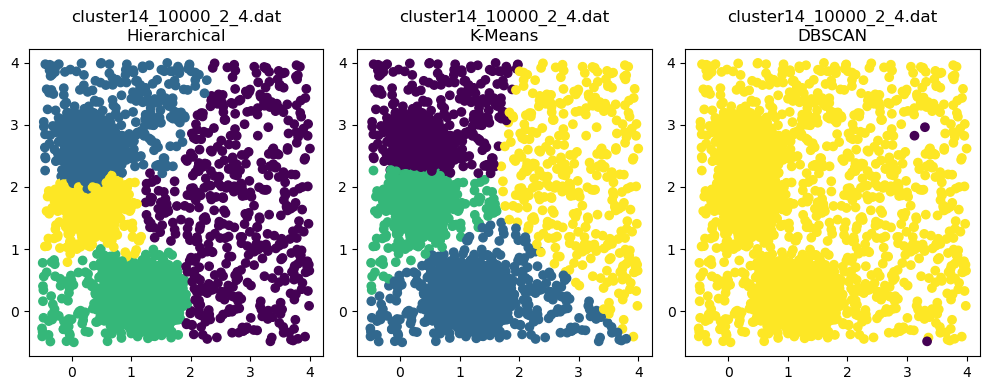

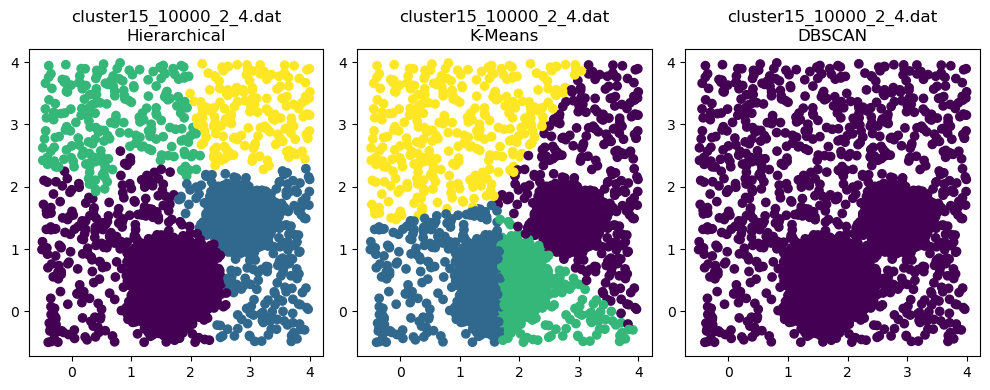

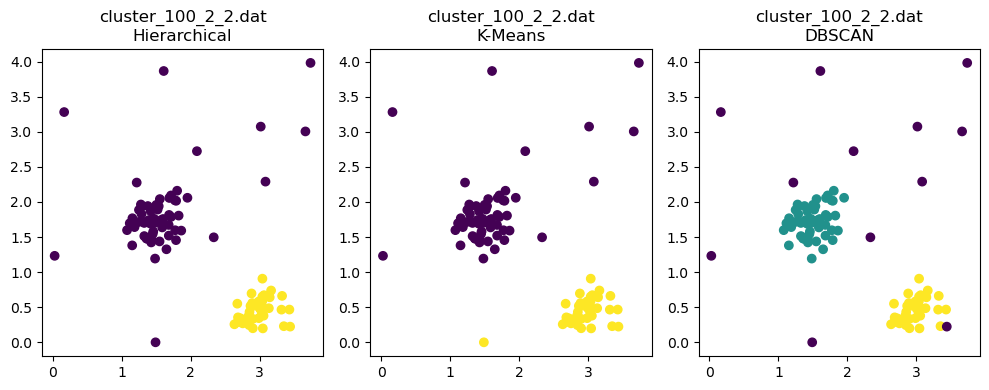

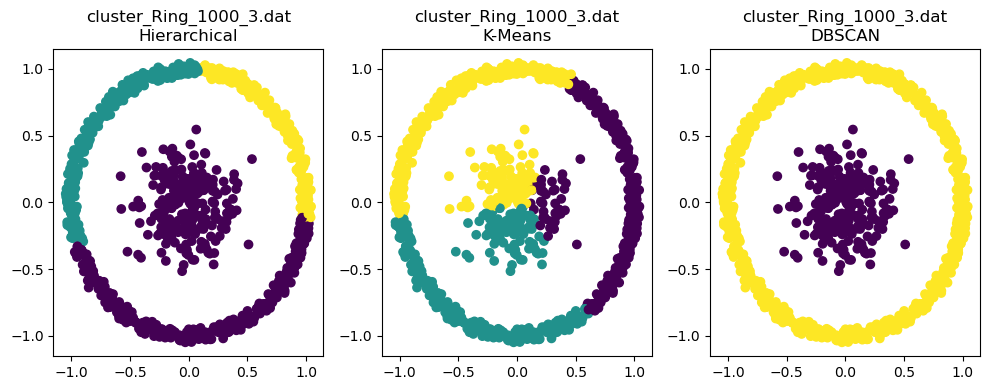

In [13]:
for filepath in sorted(two_dim):

    n, d, points = load_dat(filepath)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)


    fig, axs = plt.subplots(ncols=3, figsize=(10,4))

    axs[0].scatter(points[:,0], points[:,1], c=hierarchical.labels_)
    axs[0].set_title(f"{filepath.name}\nHierarchical")

    axs[1].scatter(points[:,0], points[:,1], c=kmeans.labels_)
    axs[1].set_title(f"{filepath.name}\nK-Means")

    axs[2].scatter(points[:,0], points[:,1], c=dbscan.labels_)
    axs[2].set_title(f"{filepath.name}\nDBSCAN")

    plt.tight_layout()

Experimentation with the parameter settings and result explanation is left to the reader.

### Exercise 3: Evaluate the results

Compute the [Davies–Bouldin index](https://en.wikipedia.org/wiki/Davies–Bouldin_index) for your tests and compare it to your empirical impression.

In [14]:
from sklearn.metrics import davies_bouldin_score

Zero is the lowest possible score. Values closer to zero indicate a better partition.

**Advantages:**
- The computation of Davies-Bouldin is simpler than that of Silhouette scores.
- The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

**Drawbacks:**
- The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.
- The usage of centroid distance limits the distance metric to Euclidean space.

In [15]:
filenames = []
hierarchical_dbi = []
kmeans_dbi = []
dbscan_dbi = []

for filepath in sorted(two_dim):
    
    filenames.append(filepath.name)
    
    n, d, points = load_dat(filepath)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)
    hierarchical_dbi.append(davies_bouldin_score(points, hierarchical.labels_))
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)
    kmeans_dbi.append(davies_bouldin_score(points, kmeans.labels_))

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)
    
    #davies_bouldin_score not defined for single cluster
    if len(np.unique(dbscan.labels_)) == 1:
        dbscan_dbi.append(99)
    else:
        dbscan_dbi.append(davies_bouldin_score(points, dbscan.labels_))
        
for filepath in sorted(three_dim):
    
    filenames.append(filepath.name)
    
    n, d, points = load_dat(filepath, dim=3)
    n_clusters = int(filepath.name.split("_")[-1][0])

    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(points)
    hierarchical_dbi.append(davies_bouldin_score(points, hierarchical.labels_))
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(points)
    kmeans_dbi.append(davies_bouldin_score(points, kmeans.labels_))

    dbscan = DBSCAN(eps=0.25) #eps is max distance between points for the same cluster
    dbscan.fit(points)
    
    #davies_bouldin_score not defined for single cluster
    if len(np.unique(dbscan.labels_)) == 1:
        dbscan_dbi.append(99)
    else:
        dbscan_dbi.append(davies_bouldin_score(points, dbscan.labels_))

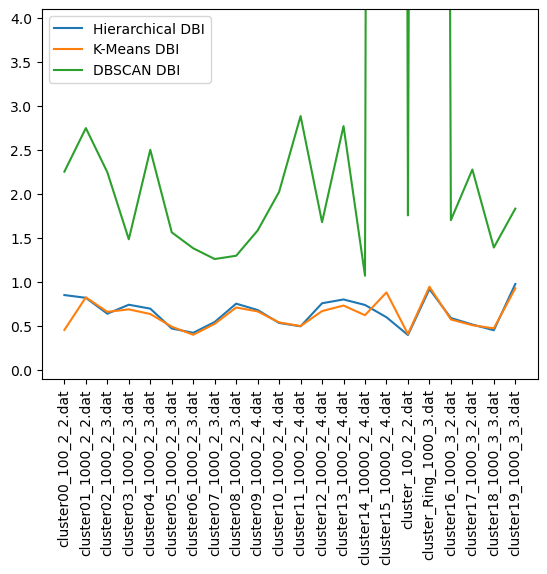

In [16]:
plt.plot(filenames, hierarchical_dbi, label="Hierarchical DBI")
plt.plot(filenames, kmeans_dbi, label="K-Means DBI")
plt.plot(filenames, dbscan_dbi, label="DBSCAN DBI")
plt.xticks(range(len(filenames)), filenames, rotation=90)
plt.legend()
plt.ylim(-0.1, 4.1)
plt.show()

### Exercise 4: Implementation
Implement the k-Means algorithm by yourself, and ensure it works properly by comparing
its results to the results from the scikit-learn version of the algorithm.

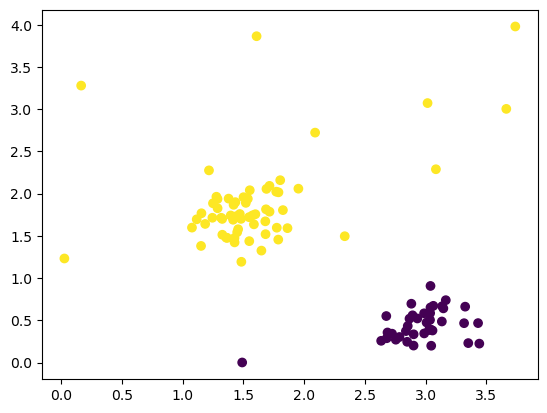

In [17]:
file = "cluster_100_2_2.dat"
filepath = Path.cwd() / 'Data' / file
n, d, points = load_dat(filepath)


## The (naive) k-means algorithm for 2D data and 2 cluster

# Step 0: Initialisation
# lets do the most basic initialisation 
# where points are picked at random

idx = np.random.randint(len(points), size=2)
representative_1, representative_2 = points[idx, :]

cluster_1 = [representative_1]
cluster_2 = [representative_2]
labels = []

def centroid(cluster_i):
    return np.sum(cluster_i, axis=0) / len(cluster_i)

# (Re)assign each data point p to the cluster C_i
# for which the distance between p and the centroid
# of C_i
for p in points:
    
    # lets use euclidean distance
    d_1 = np.sqrt(np.sum(np.square(centroid(cluster_1) - p)))
    d_2 = np.sqrt(np.sum(np.square(centroid(cluster_2) - p)))
    
    if d_1 < d_2:
        cluster_1.append(p)
        labels.append(1)
    else:
        cluster_2.append(p)
        labels.append(2)
        
plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.show()